# Analysis
- As is expected, temperatures rise the closer a city is to the equator (0 degree latitude). 
- Humidity does not have a strong relationship to latitude however there are a higher concentration of cities in the northern hemisphere(above 0 degrees latitude) with humidity hovering above 80%.
- Cloud coverage also does not have a strong relationship with latitude. 
- Wind Speeds tend to be between 0-10 MPH regardless of latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from config import open_weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# set current datetime
current_datetime = datetime.datetime.now()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'{len(cities)} total cities found')

617 total cities found


## Perform API Calls to fetch current weather data
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#create list to hold on to weather data pulled from api
weather_data = []

# setup params for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"
params ={
    'appid': open_weather_key,
    'units': 'imperial'
}

counter = 1

print (f'Begging search for current weather conditions for {len(cities)} cities......')

for city in cities:
    print(f'Processing city #{counter} | {city}....')
    params['q'] = city    
    
    try:
        # make call, fetch out data elements, add to final list
        response_json = requests.get(base_url, params=params).json()
        city_name = response_json['name']
        country = response_json['sys']['country']
        latitude = response_json['coord']['lat']
        longitude = response_json['coord']['lon']
        temp = response_json['main']['temp']
        humidity = response_json['main']['humidity']
        cloudiness = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        weather_data.append([city_name, country, latitude, longitude, temp, humidity, cloudiness, wind_speed])
        
        # API throttles to 60 calls/min, so let's sleep time 1 sec between calls to prevent API issues
        time.sleep(1)
    except:
        # city is not found OR all pieces of necessary weather data cannot be extracted
        print(f'City #{counter} | {city} not found or weather data not available')
    
    counter += 1
    
print(f'Processing complete. Retrieved weather data for {len(weather_data)} cities.')
        

Begging search for current weather conditions for 617 cities......
Processing city #1 | port elizabeth....
Processing city #2 | port alfred....
Processing city #3 | jalu....
Processing city #4 | albany....
Processing city #5 | faanui....
Processing city #6 | ostrovnoy....
Processing city #7 | saint-philippe....
Processing city #8 | esperance....
Processing city #9 | mataura....
Processing city #10 | barrow....
Processing city #11 | manacapuru....
Processing city #12 | lagoa....
Processing city #13 | saint-francois....
Processing city #14 | tete....
Processing city #15 | naze....
Processing city #16 | palauig....
Processing city #17 | svetlogorsk....
Processing city #18 | honiara....
Processing city #19 | marcona....
City #19 | marcona not found or weather data not available
Processing city #20 | necochea....
Processing city #21 | kununurra....
Processing city #22 | taolanaro....
City #22 | taolanaro not found or weather data not available
Processing city #23 | illoqqortoormiut....
City

Processing city #198 | saint peter....
Processing city #199 | guiyang....
Processing city #200 | usinsk....
Processing city #201 | hilo....
Processing city #202 | salaga....
Processing city #203 | yining....
Processing city #204 | klaksvik....
Processing city #205 | lavrentiya....
Processing city #206 | barawe....
City #206 | barawe not found or weather data not available
Processing city #207 | maxixe....
Processing city #208 | sangueya....
Processing city #209 | new norfolk....
Processing city #210 | xichang....
Processing city #211 | bereda....
Processing city #212 | coldwater....
Processing city #213 | northam....
Processing city #214 | hihifo....
City #214 | hihifo not found or weather data not available
Processing city #215 | ierapetra....
Processing city #216 | hobyo....
Processing city #217 | alacranes....
Processing city #218 | villamontes....
Processing city #219 | bethel....
Processing city #220 | carnarvon....
Processing city #221 | walvis bay....
Processing city #222 | mahe

Processing city #386 | arica....
Processing city #387 | kleck....
City #387 | kleck not found or weather data not available
Processing city #388 | visim....
Processing city #389 | kautokeino....
Processing city #390 | tagab....
Processing city #391 | poum....
Processing city #392 | hirara....
Processing city #393 | rockport....
Processing city #394 | saint joseph....
Processing city #395 | tasbuget....
City #395 | tasbuget not found or weather data not available
Processing city #396 | gondanglegi....
Processing city #397 | las palmas....
Processing city #398 | dali....
Processing city #399 | kikwit....
Processing city #400 | hambantota....
Processing city #401 | grindavik....
Processing city #402 | boende....
Processing city #403 | iskandar....
Processing city #404 | grand river south east....
City #404 | grand river south east not found or weather data not available
Processing city #405 | pisco....
Processing city #406 | richards bay....
Processing city #407 | ternate....
Processing c

Processing city #573 | diamantino....
Processing city #574 | gurgan....
City #574 | gurgan not found or weather data not available
Processing city #575 | myitkyina....
Processing city #576 | anaconda....
Processing city #577 | olafsvik....
City #577 | olafsvik not found or weather data not available
Processing city #578 | aleksandrovsk....
Processing city #579 | zeya....
Processing city #580 | konyshevka....
Processing city #581 | saravan....
Processing city #582 | mitsamiouli....
Processing city #583 | sakakah....
City #583 | sakakah not found or weather data not available
Processing city #584 | yamada....
Processing city #585 | buy....
Processing city #586 | cockburn harbour....
City #586 | cockburn harbour not found or weather data not available
Processing city #587 | paamiut....
Processing city #588 | aguimes....
Processing city #589 | aloleng....
Processing city #590 | madang....
Processing city #591 | bandarbeyla....
Processing city #592 | labuhan....
Processing city #593 | zamor

In [4]:
# create dataframe of found weather data
columns = ['City Name', 'Country Code', 'Latitude', 'Longitude', 
           'Temperature (F)', 'Humidity (%)', 'Cloud Coverage (%)', 'Wind Speed (MPH)']
df_weather_data = pd.DataFrame(weather_data, columns=columns) 
df_weather_data.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (MPH)
0,Port Elizabeth,US,39.31,-74.98,64.51,82,75,5.59
1,Port Alfred,ZA,-33.59,26.89,61.00,77,89,7.00
2,Jalu,LY,29.03,21.55,77.47,52,0,7.52
3,Albany,US,42.65,-73.75,57.72,72,1,3.36
4,Faanui,PF,-16.48,-151.75,78.91,70,29,9.53


In [5]:
# save dataframe as csv file
df_weather_data.to_csv(output_data_file, index=False)

print(f'Weather data has been saved as csv file to the following location: {output_data_file}')

Weather data has been saved as csv file to the following location: output_data/weather_data.csv


## Create Scatterplots

### Temperature (F) vs. Latitude

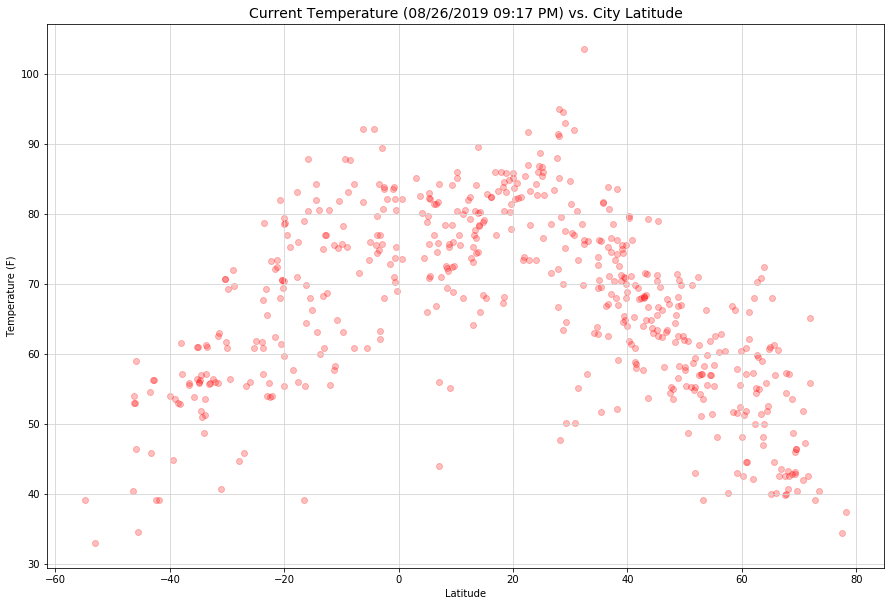

In [7]:
# create scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df_weather_data['Latitude'], df_weather_data['Temperature (F)'], alpha=.25, facecolor='red')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title(f'Current Temperature ({current_datetime.strftime("%m/%d/%Y %I:%M %p")}) vs. City Latitude', fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/TemperatureVsLatitude.png")
plt.show()

### Humidity (%) vs. Latitude

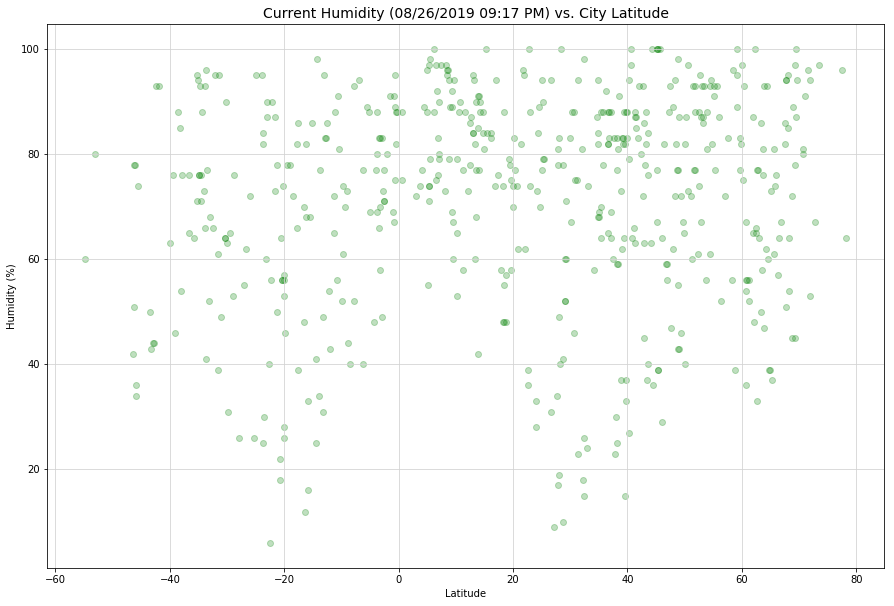

In [8]:
# create scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df_weather_data['Latitude'], df_weather_data['Humidity (%)'], alpha=.25, facecolor='green')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title(f'Current Humidity ({current_datetime.strftime("%m/%d/%Y %I:%M %p")}) vs. City Latitude', fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/HumidityVsLatitude.png")
plt.show()

### Cloudiness (%) vs. Latitude

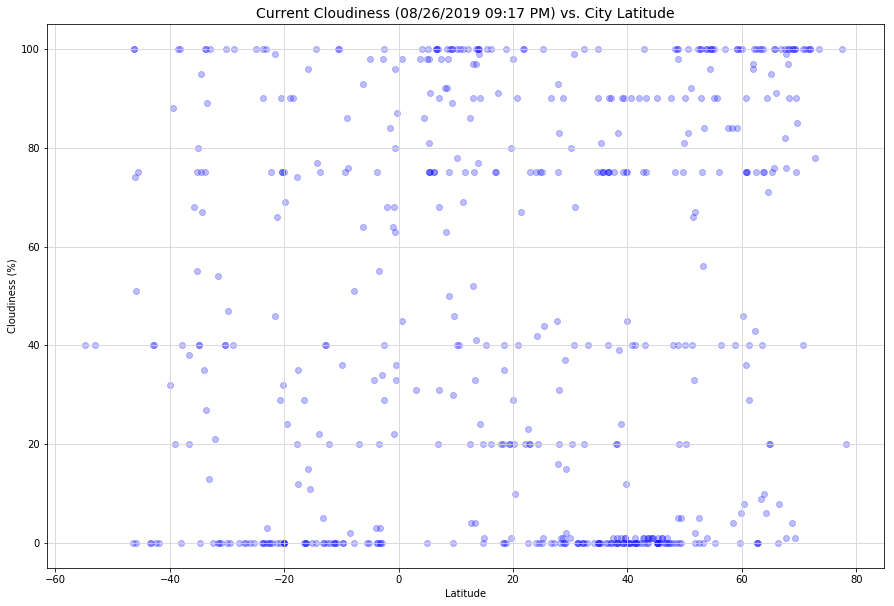

In [14]:
# create scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df_weather_data['Latitude'], df_weather_data['Cloud Coverage (%)'], alpha=.25, facecolor='blue')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title(f'Current Cloudiness ({current_datetime.strftime("%m/%d/%Y %I:%M %p")}) vs. City Latitude', fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CloudinessVsLatitude.png")
plt.show()

### Wind Speed (mph) vs. Latitude

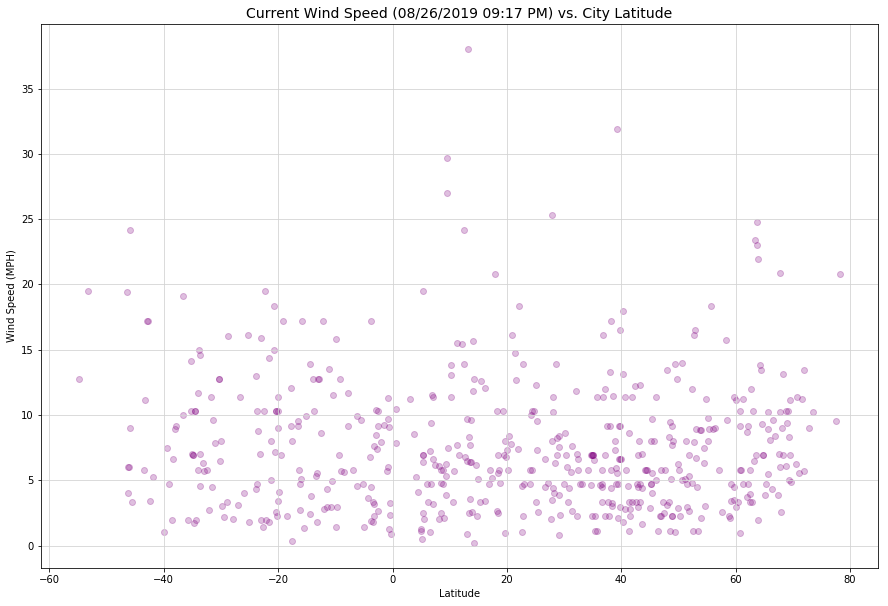

In [12]:
# create scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df_weather_data['Latitude'], df_weather_data['Wind Speed (MPH)'], alpha=.25, facecolor='purple')
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.title(f'Current Wind Speed ({current_datetime.strftime("%m/%d/%Y %I:%M %p")}) vs. City Latitude', fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("output_data/WindSpeedVsLatitude.png")
plt.show()